In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [128]:
train = pd.read_csv('train.csv')

In [136]:
train.drop(213, axis = 'index', inplace = True)

In [137]:
train

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [138]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
x    699 non-null float64
y    699 non-null float64
dtypes: float64(2)
memory usage: 16.4 KB


In [139]:
train.describe()

,x,y
count,699.000000,699.000000
mean,50.014306,49.939869
std,28.954560,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,100.000000,108.871618


In [140]:
test = pd.read_csv('test.csv')

In [141]:
test

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


In [142]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
x    300 non-null int64
y    300 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


In [143]:
test.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [144]:
train.columns

Index(['x', 'y'], dtype='object')

In [172]:
x_train = train['x']

In [173]:
y_train = train['y']

In [174]:
x_test = test['x']

In [175]:
y_test = test['y']

In [176]:
# x_train, x_test, y_train, y_test = train_test_split(train['x'], train['y'], test_size = 0.3, random_state = 101)

## Plotting

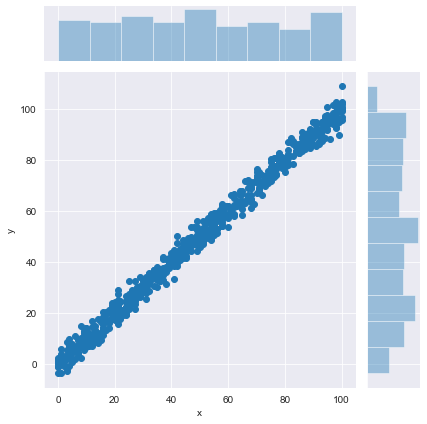

In [177]:
sns.set_style('darkgrid')
sns.jointplot(x = 'x', y = 'y', data = train)

In [178]:
lm = LinearRegression()

In [179]:
x_train.shape

(699,)

In [180]:
y_train.shape

(699,)

In [181]:
x_train

0      24.0
1      50.0
2      15.0
3      38.0
4      87.0
       ... 
695    58.0
696    93.0
697    82.0
698    66.0
699    97.0
Name: x, Length: 699, dtype: float64

In [182]:
y_train

0      21.549452
1      47.464463
2      17.218656
3      36.586398
4      87.288984
         ...    
695    58.595006
696    94.625094
697    88.603770
698    63.648685
699    94.975266
Name: y, Length: 699, dtype: float64

In [183]:
lm.fit(x_train[:,None], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [184]:
lm.coef_

array([1.00065638])

In [185]:
lm.intercept_

-0.10726546430097272

In [192]:
predictions = lm.predict(x_test[:,None])

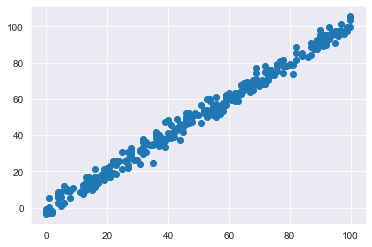

In [193]:
plt.scatter(predictions, y_test)

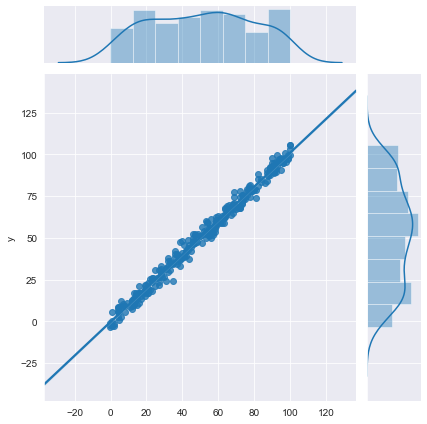

In [205]:
sns.jointplot(x = predictions, y = y_test, kind = 'reg')

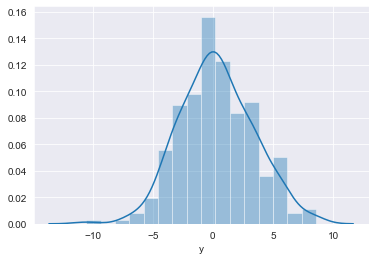

In [195]:
sns.distplot(y_test - predictions)

In [196]:
metrics.mean_absolute_error(y_test, predictions)

2.415771850041258

In [197]:
metrics.mean_squared_error(y_test, predictions)

9.432922192039305

In [198]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

3.071306268029827

In [201]:
lm.score(x_test[:,None], y_test)

0.9888014444327563